<a href="https://colab.research.google.com/github/gustavogrds/ARIMAX/blob/main/modelo/Modelo_de_Cr%C3%A9dito_Exemplo_Simplificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

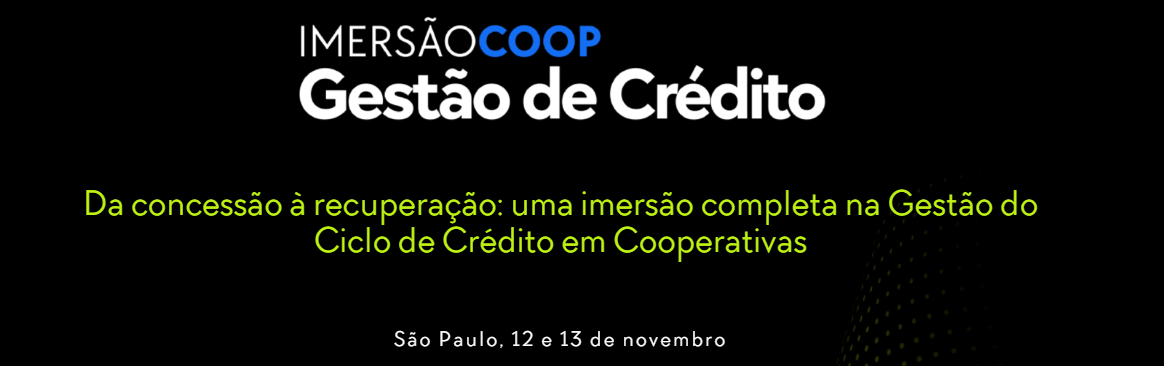

# **Atividade Prática**  

## **Modelo de Aprendizado de Máquina Simplificado**

Atividade Prática usando a base de dados adaptada de [Bank](https://archive.ics.uci.edu/dataset/222/bank+marketing). Para ler a base de dados usando o Pandas, utilize [este link](https://raw.githubusercontent.com/gustavogrds/imersaocoop25/refs/heads/main/data/bank.csv).

O interesse nesse conjunto de dados é criar um modelo computacional que consiga prever se um cliente do banco cumprirá seus compromissos financeiros ou não com as dívidas assumidas. Essa informação está na última coluna (chamada *y*).



In [67]:
# Importando o conjunto de dados

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/gustavogrds/imersaocoop25/refs/heads/main/data/bank.csv", sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Questão**


Há quantas variáveis (dados de entrada) e pessoas (amostras), respectivamente, nessa base de dados?

Há quantas pessoas (amostras) e variáveis preditoras (dados de entrada), respectivamente, nessa base de dados?

Faça o teste usando o GEMINI do Google para gerar as respostas.

In [68]:
df.shape

(45211, 17)

**Questão 2.**

Qual o percentual de pessoas com *idade* superior a 40 anos?

Qual o percentual de pessoas com *idade* superior a 25 anos?

Qual o percentual de pessoas cuja duração da chamada telefônica durou mais do que 100 minutos?

Qual o percentual de pessoas cuja duração da chamada telefônica durou mais do que 90 minutos?

Qual o percentual de pessoas cuja duração da chamada telefônica durou mais do que 70 minutos?

In [69]:
print('age > 40: ', len(df[df.age > 40])/len(df))
print('age > 25: ', len(df[df.age > 25])/len(df))
print('duration > 100: ', len(df[df.duration > 100])/len(df))
print('duration > 90: ', len(df[df.duration > 90])/len(df))
print('duration > 70: ', len(df[df.duration > 70])/len(df))

age > 40:  0.4532967640618434
age > 25:  0.9704496693282608
duration > 100:  0.7592842449846277
duration > 90:  0.7945411514896817
duration > 70:  0.8647231868350622


# **Modelo**

Vamos começar com a brincadeira básica de analisar se a idade apenas pode separar os clientes adimplentes dos inadimplentes. No nosso exemplo, o campo age é a idade de cada cliente e y a variável resposta se o cliente é inadimplente ou não.

In [70]:
from sklearn.model_selection import train_test_split

# Separando variáveis independentes das dependentes
X = df.age
y = df['y']

# Separando em treino e Teste (30% para Teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

Com base nos dados de treinamento e teste encontrados no item anterior, vamos construir um modelo de regressão logística para prever se o cliente se tornará inadimplente ao longo do tempo.


In [71]:
from sklearn.linear_model import LogisticRegression


# Declarando o modelo
model = LogisticRegression()

# Treinando o modelo (com o conjunto de Treino)
model.fit(pd.DataFrame(X_train),y_train)

# Utilizando o modelo para prever novos casos
y_pred=model.predict(pd.DataFrame(X_test))

In [72]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calcular a accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8876479044564857


A acurácia, por si só, não é suficiente para verificar a capacidade preditiva de um modelo de classificação em muitos casos, especialmente quando os dados são desbalanceados ou quando as classes têm diferentes custos associados a erros de classificação. Existem várias razões pelas quais a acurácia isoladamente pode ser enganosa ou inadequada:

1. **Desbalanceamento de Classes**: Em problemas em que as classes são
desequilibradas, ou seja, uma classe tem muito mais exemplos do que a outra, a acurácia pode ser enganosa. O modelo pode atingir uma alta acurácia simplesmente prevendo a classe majoritária em quase todos os casos, enquanto falha em identificar a classe minoritária. Nesse caso, a acurácia não reflete a capacidade do modelo de identificar corretamente as amostras da classe minoritária.

2. **Custo dos Erros**: Em muitos cenários, cometer um tipo específico de erro pode ser mais crítico do que outro. Por exemplo, em diagnósticos médicos, um falso negativo (não diagnosticar uma doença quando ela está presente) pode ter consequências mais graves do que um falso positivo (diagnosticar erroneamente uma doença). A acurácia não leva em consideração o custo associado a diferentes tipos de erros.

3. **Contexto do Problema**: A escolha de métricas de avaliação deve ser guiada pelo contexto do problema. O que é mais importante: minimizar falsos positivos, minimizar falsos negativos, encontrar um equilíbrio entre ambos ou otimizar para outra métrica específica? A acurácia não leva em consideração as nuances do problema.

4. **Métricas Personalizadas**: Em alguns casos, métricas personalizadas podem ser mais relevantes do que a acurácia. Por exemplo, em aplicações de detecção de fraudes, você pode criar uma métrica personalizada que leve em consideração o impacto financeiro dos erros de classificação.

Portanto, a acurácia é uma métrica valiosa, mas não deve ser usada isoladamente. É importante considerar métricas adicionais que se alinhem com os objetivos e as peculiaridades do problema de classificação em questão, especialmente quando há desequilíbrio de classes ou custos desiguais associados a diferentes tipos de erros. Essas métricas proporcionarão uma compreensão mais completa do desempenho do modelo. A seguir vamos entender como a matriz de confusão pode ajudar neste processo.






# Matriz de Confusão:

## O que é:
Matriz de confusão é uma visualização tabular dos rótulos da verdade versus previsões do modelo. Cada linha da matriz de confusão representa as instâncias de uma classe prevista e cada coluna representa as instâncias de uma classe real. A Matriz de Confusão não é exatamente uma métrica de desempenho, mas uma espécie de base sobre a qual outras métricas avaliam os resultados.

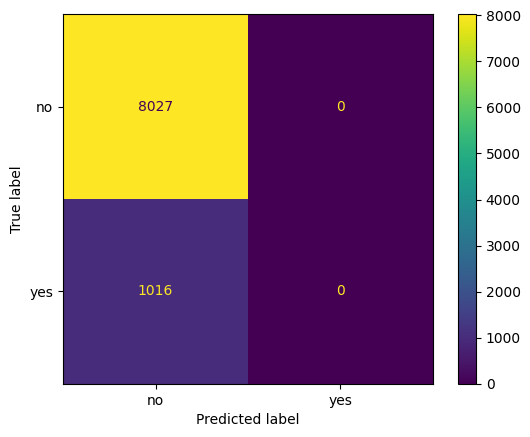

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()
plt.show()

Considere, agora, como variáveis de entrada as seguintes: *age*, *balance*, *duration* e *previous*. Separe os dados em treinamento (70% dos dados) e teste (30% dos dados) usando o comando `train_test_split` e com `random_state = 4`. Construa um modelo de regressão logística para prever se um futuro cliente irá dar default ou não.

In [74]:
# Separando variáveis independentes das dependentes
x = df[['age', 'balance', 'duration', 'previous']]
y = df['y']

# Separando em treino e Teste (30% para Teste)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

# Declarando o modelo
model = LogisticRegression()

# Treinando o modelo (com o conjunto de Treino)
model.fit(pd.DataFrame(X_train),y_train)

# Utilizando o modelo para prever novos casos
y_pred=model.predict(pd.DataFrame(X_test))

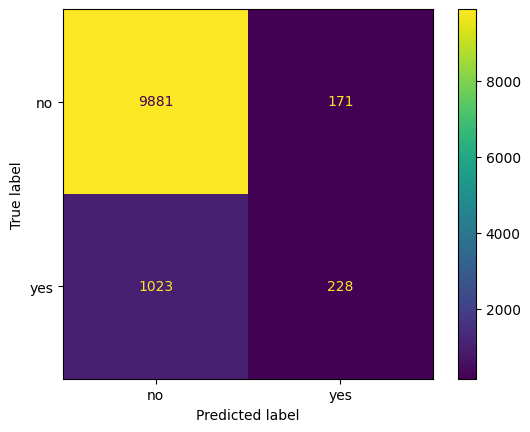

In [75]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()
plt.show()

**Questão**

Qual o percentual de acertos (acurácia) nos dados de teste para o modelo anterior?

In [76]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calcular a accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8943643280544988
